In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data

plt.style.use('fivethirtyeight')
%matplotlib inline

In [2]:
import yfinance as yf
import datetime as dt

stock = "POWERGRID.NS"
start = dt.datetime(2000, 1, 1)
end = dt.datetime(2024, 11, 1)

data = yf.download(stock, start, end)
if data is not None:
    df = data
else:
    df = None
    print("Failed to download data for the stock:", stock)

/var/folders/l6/5ccjw8px10j9fzzs0j_tnd840000gn/T/ipykernel_68570/3928248222.py:8: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(stock, start, end)
[*********************100%***********************]  1 of 1 completed


In [3]:
# Display the first 5 rows of the dataframe
df.head()

Price,Close,High,Low,Open,Volume
Ticker,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS
Date,,,,,
2007-10-05,32.405308,35.272180,26.784307,28.926408,855215656
2007-10-08,30.746395,33.500524,30.553122,33.500524,126671715
2007-10-09,32.840176,33.130083,29.103579,30.762498,116725709
2007-10-10,33.146191,33.822644,32.856283,33.693795,67931378
2007-10-11,36.850574,38.654449,32.856283,38.654449,106320954


In [4]:
df.shape

(4208, 5)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4208 entries, 2007-10-05 to 2024-10-31
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   (Close, POWERGRID.NS)   4208 non-null   float64
 1   (High, POWERGRID.NS)    4208 non-null   float64
 2   (Low, POWERGRID.NS)     4208 non-null   float64
 3   (Open, POWERGRID.NS)    4208 non-null   float64
 4   (Volume, POWERGRID.NS)  4208 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 197.2 KB


In [6]:
df.isnull().sum()

Price   Ticker      
Close   POWERGRID.NS    0
High    POWERGRID.NS    0
Low     POWERGRID.NS    0
Open    POWERGRID.NS    0
Volume  POWERGRID.NS    0
dtype: int64

In [7]:
df.describe()

Price,Close,High,Low,Open,Volume
Ticker,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS
count,4208.000000,4208.000000,4208.000000,4208.000000,4.208000e+03
mean,79.141362,80.170391,78.124958,79.178243,1.188963e+07
std,63.296897,64.036505,62.509396,63.278624,2.061999e+07
min,18.919933,20.224756,16.962699,20.126894,0.000000e+00
25%,36.371869,36.945684,35.834695,36.409104,4.799653e+06
50%,55.265991,55.904102,54.526364,55.372079,8.344398e+06
75%,82.755178,83.742967,81.773878,82.777687,1.362032e+07
max,354.580750,355.356950,346.576122,353.222365,8.552157e+08


In [8]:

df = df.reset_index()

In [9]:
df.columns

MultiIndex([(  'Date',             ''),
            ( 'Close', 'POWERGRID.NS'),
            (  'High', 'POWERGRID.NS'),
            (   'Low', 'POWERGRID.NS'),
            (  'Open', 'POWERGRID.NS'),
            ('Volume', 'POWERGRID.NS')],
           names=['Price', 'Ticker'])

In [10]:
df.to_csv('/Users/mac/Downloads/Stock-Market-Predictor/Data/POWERGRID.NS.csv')

In [11]:
data01 = pd.read_csv("/Users/mac/Downloads/Stock-Market-Predictor/Data/POWERGRID.NS.csv")

In [12]:
data01.head()

,Price,Date,Close,High,Low,Open,Volume
0,Ticker,NaN,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS
1,0,2007-10-05,32.40530776977539,35.27217958791646,26.784307105907242,28.9264082901474,855215656
2,1,2007-10-08,30.746395111083984,33.50052448695849,30.553122031033062,33.50052448695849,126671715
3,2,2007-10-09,32.84017562866211,33.130083049065135,29.103578962810516,30.762497772540108,116725709
4,3,2007-10-10,33.14619064331055,33.822644226894305,32.856283212928,33.69379478098779,67931378


In [13]:
# Candlesticks 
import plotly.graph_objects as go

fig = go.Figure(data=[go.Candlestick(x = data01['Date'], open = data01['Open'], 
                                    high = data01['High'],
                                    low = data01['Low'], 
                                    close = data01['Close'])])
fig.update_layout(xaxis_rangeslider_visible=False)
fig.show()

In [14]:
df = df.drop(['Date'], axis = 1)

/var/folders/l6/5ccjw8px10j9fzzs0j_tnd840000gn/T/ipykernel_68570/1002300862.py:1: PerformanceWarning:

dropping on a non-lexsorted multi-index without a level parameter may impact performance.



In [15]:
df.head()

Price,Close,High,Low,Open,Volume
Ticker,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS
0,32.405308,35.272180,26.784307,28.926408,855215656
1,30.746395,33.500524,30.553122,33.500524,126671715
2,32.840176,33.130083,29.103579,30.762498,116725709
3,33.146191,33.822644,32.856283,33.693795,67931378
4,36.850574,38.654449,32.856283,38.654449,106320954


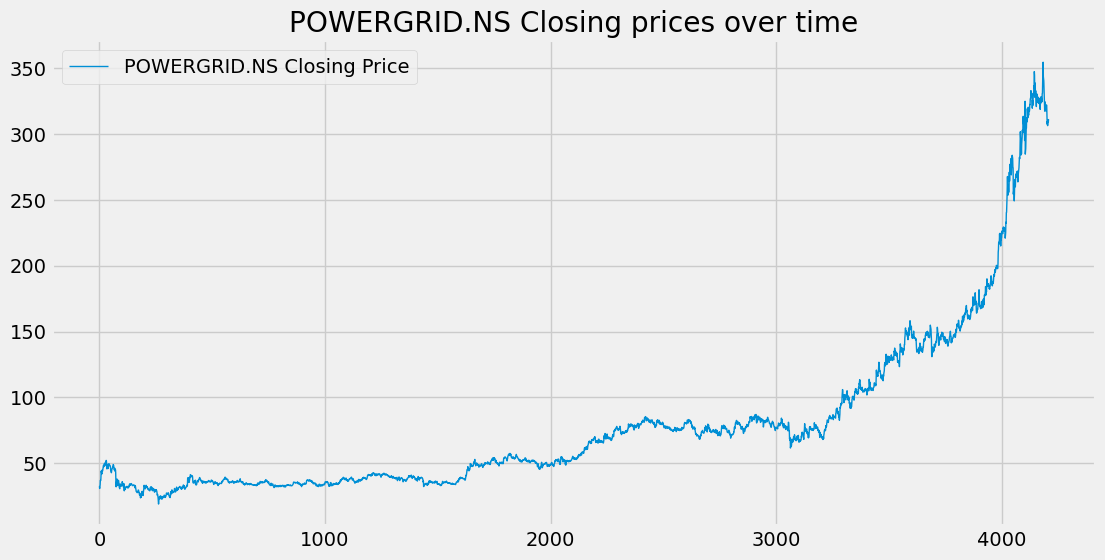

In [16]:
plt.figure(figsize=(12, 6))
plt.plot(df['Close'], label = f'{stock} Closing Price', linewidth = 1)
plt.title(f'{stock} Closing prices over time')
plt.legend()
plt.show()

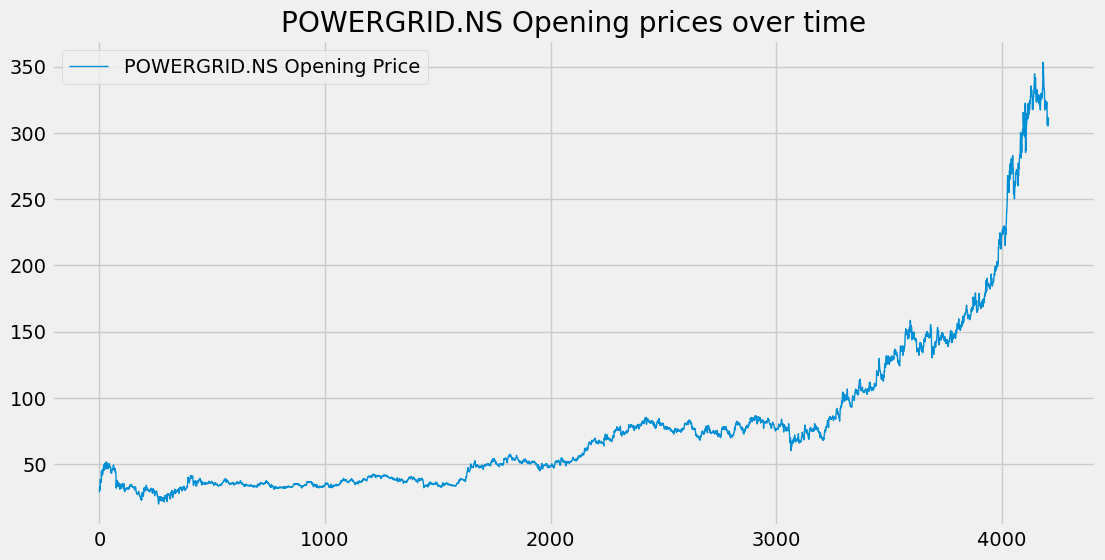

In [17]:
plt.figure(figsize=(12, 6))
plt.plot(df['Open'], label = f'{stock} Opening Price', linewidth = 1)
plt.title(f'{stock} Opening prices over time')
plt.legend()
plt.show()

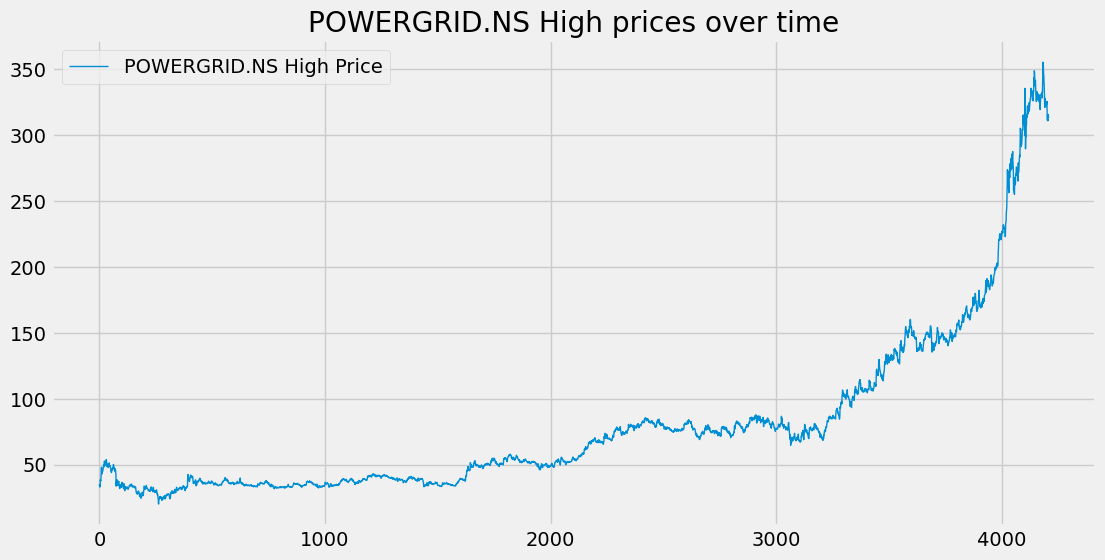

In [18]:
plt.figure(figsize=(12, 6))
plt.plot(df['High'], label = f'{stock} High Price', linewidth = 1)
plt.title(f'{stock} High prices over time')
plt.legend()
plt.show()

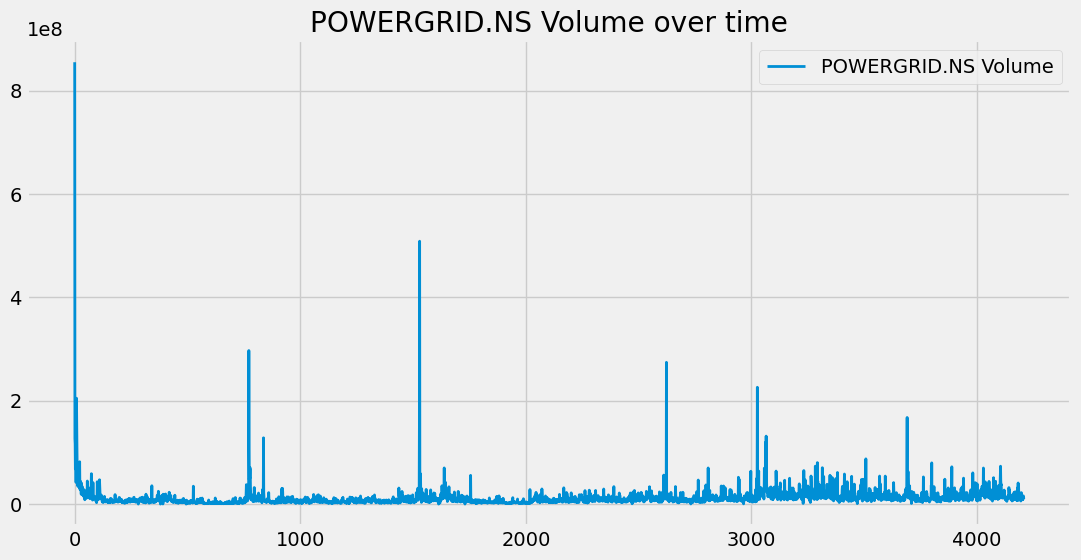

In [19]:
plt.figure(figsize=(12, 6))
plt.plot(df['Volume'], label = f'{stock} Volume', linewidth = 2)
plt.title(f'{stock} Volume over time')
plt.legend()
plt.show()

In [20]:
ma100 = df.Close.rolling(100).mean()
ma200 = df.Close.rolling(200).mean()

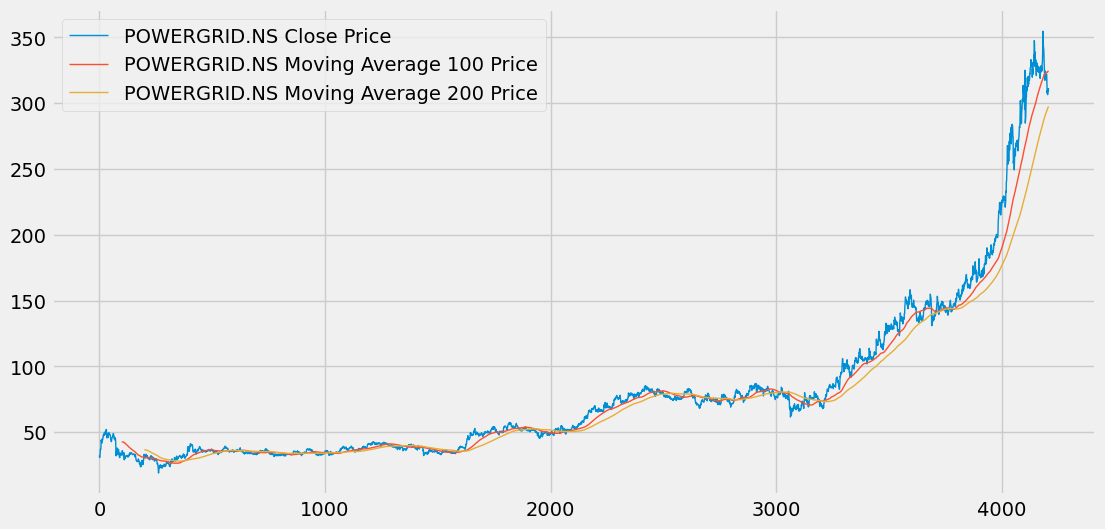

In [21]:
plt.figure(figsize=(12, 6))
plt.plot(df.Close, label = f'{stock} Close Price', linewidth = 1)
plt.plot(ma100, label = f'{stock} Moving Average 100 Price', linewidth = 1)
plt.plot(ma200, label = f'{stock} Moving Average 200 Price', linewidth = 1)
plt.legend()
plt.show()

In [22]:
ema100 = df.Close.ewm(span=100, adjust = False).mean()
ema200 = df['Close'].ewm(span=200, adjust = False).mean()

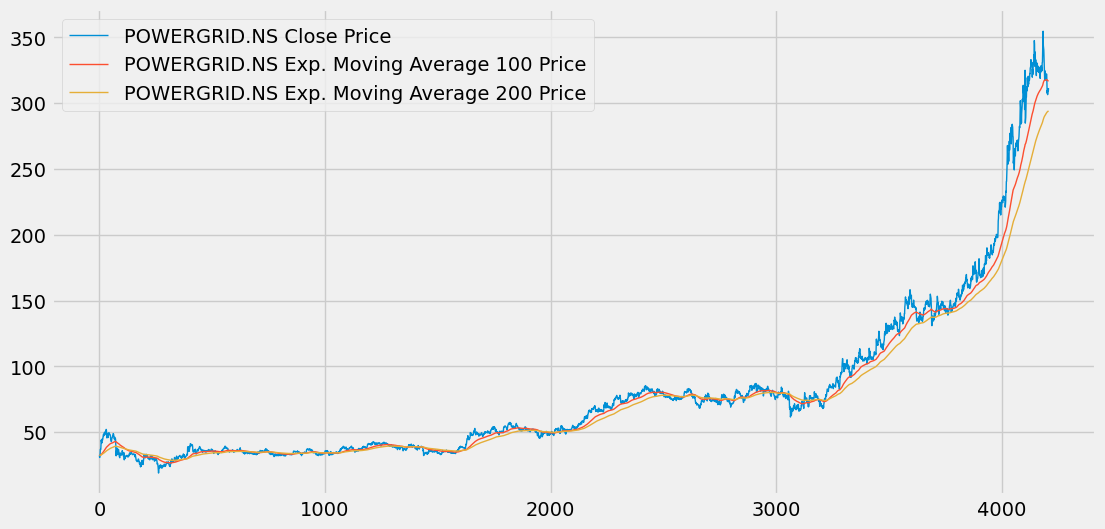

In [23]:
plt.figure(figsize=(12, 6))
plt.plot(df.Close, label = f'{stock} Close Price', linewidth = 1)
plt.plot(ema100, label = f'{stock} Exp. Moving Average 100 Price', linewidth = 1)
plt.plot(ema200, label = f'{stock} Exp. Moving Average 200 Price', linewidth = 1)
plt.legend()
plt.show()

In [24]:
# Training & Testing

data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70): int(len(df))])


In [25]:
data_training.head()

Ticker,POWERGRID.NS
0,32.405308
1,30.746395
2,32.840176
3,33.146191
4,36.850574


In [26]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range = (0, 1))

In [27]:
data_training_array = scaler.fit_transform(data_training)

In [28]:
data_training_array

array([[0.19808592],
       [0.17371824],
       [0.20447367],
       ...,
       [0.90774437],
       [0.86000351],
       [0.87299619]])

In [29]:
data_training_array[100, 0]

0.23522909198168113

In [30]:
data_training_array[0:100]

array([[0.19808592],
       [0.17371824],
       [0.20447367],
       [0.2089687 ],
       [0.26338219],
       [0.25983345],
       [0.26693093],
       [0.32252729],
       [0.36937021],
       [0.34665839],
       [0.34452944],
       [0.33624904],
       [0.38001626],
       [0.36984348],
       [0.36842386],
       [0.38782346],
       [0.40130874],
       [0.41644988],
       [0.43088101],
       [0.41503031],
       [0.42756901],
       [0.44200048],
       [0.4514636 ],
       [0.44081761],
       [0.42851565],
       [0.44554928],
       [0.46281953],
       [0.45311962],
       [0.46542186],
       [0.4602171 ],
       [0.48695069],
       [0.47512155],
       [0.41644988],
       [0.39255507],
       [0.43703241],
       [0.44271004],
       [0.42496658],
       [0.41455711],
       [0.39586729],
       [0.4218911 ],
       [0.43182753],
       [0.422601  ],
       [0.45051724],
       [0.43703241],
       [0.4339566 ],
       [0.43466643],
       [0.4313541 ],
       [0.430

In [31]:
x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100:i])
    y_train.append(data_training_array[i, 0])

x_train, y_train  = np.array(x_train), np.array(y_train)

In [32]:
x_train.shape, y_train.shape

((2845, 100, 1), (2845,))

In [33]:
# Model Building
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [34]:
model = Sequential()

model.add(LSTM(units = 50, activation = 'relu', return_sequences = True, input_shape = (x_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 1))

In [35]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [36]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.fit(x_train, y_train, epochs = 50)

Epoch 1/50


2025-09-21 17:41:44.671141: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


89/89 [==============================] - 13s 123ms/step - loss: 0.0370
Epoch 2/50
89/89 [==============================] - 12s 129ms/step - loss: 0.0087
Epoch 3/50
89/89 [==============================] - 12s 132ms/step - loss: 0.0075
Epoch 4/50
89/89 [==============================] - 12s 135ms/step - loss: 0.0068
Epoch 5/50
89/89 [==============================] - 11s 127ms/step - loss: 0.0066
Epoch 6/50
89/89 [==============================] - 11s 127ms/step - loss: 0.0057
Epoch 7/50
89/89 [==============================] - 12s 132ms/step - loss: 0.0054
Epoch 8/50
89/89 [==============================] - 12s 140ms/step - loss: 0.0054
Epoch 9/50
89/89 [==============================] - 12s 130ms/step - loss: 0.0050
Epoch 10/50
89/89 [==============================] - 11s 129ms/step - loss: 0.0046
Epoch 11/50
89/89 [==============================] - 12s 137ms/step - loss: 0.0050
Epoch 12/50
89/89 [==============================] - 12s 132ms/step - loss: 0.0046
Epoch 13/50
89/89 [=====

In [37]:
past_100_days = data_training.tail(100)

In [39]:

final_df = pd.concat([past_100_days, data_testing], ignore_index=True)

In [40]:
final_df.head()

Ticker,POWERGRID.NS
0,75.777992
1,77.322815
2,77.587067
3,77.424446
4,77.871643


In [41]:
input_data = scaler.fit_transform(final_df)

In [44]:
input_data.shape

(1363, 1)

In [42]:
x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i, 0])

x_test, y_test  = np.array(x_test), np.array(y_test)

In [43]:
x_test.shape

(1263, 100, 1)

In [45]:
y_predicted = model.predict(x_test)

40/40 [==============================] - 2s 39ms/step


In [46]:
scaler.scale_

array([0.00341187])

In [47]:
scaler_factor = 1 / 0.0035166
y_predicted = y_predicted * scaler_factor
y_test = y_test * scaler_factor

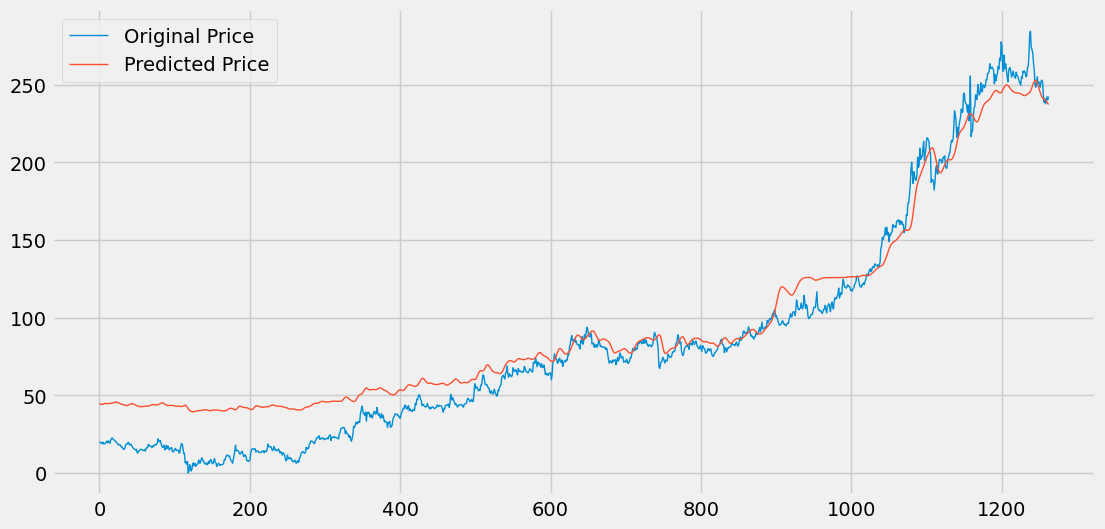

In [48]:
plt.figure(figsize=(12, 6))
plt.plot(y_test, label = 'Original Price', linewidth = 1)
plt.plot(y_predicted, label = 'Predicted Price', linewidth = 1)
plt.legend()
plt.show()

In [49]:
model.save('stock_dl_model.h5')